In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean


In [3]:
# Load Data
path = "data/"
df_inpiedi = pd.read_csv(path+"info_inpiedi.txt",sep="\\t")
df_seduta = pd.read_csv(path+"info_seduta.txt",sep="\\t")
df_sdraiata = pd.read_csv(path+"info_sdraiata.txt",sep="\\t")

<ipython-input-3-2cbaaffd2963>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_inpiedi = pd.read_csv(path+"info_inpiedi.txt",sep="\\t")
<ipython-input-3-2cbaaffd2963>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_seduta = pd.read_csv(path+"info_seduta.txt",sep="\\t")
<ipython-input-3-2cbaaffd2963>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df_sdraiata = pd.read_csv(path+"info_sdraiata.txt",sep="\

In [5]:
# Create table with all formant values from all positions
df = pd.concat((df_inpiedi,df_seduta,df_sdraiata))
df

�� T i m e   \
0                                           0 . 0 0 5    
1                                         0 . 2 0 7 5    
2                                             0 . 4 1    
3                                 0 . 0 0 5 : 0 . 4 1    
4                                           0 . 4 1 5    
..                                                 ...   
487   1 5 . 3 1 5 0 0 0 0 0 0 0 0 0 0 0 1 : 1 5 . 4 3    
488                                       1 5 . 4 3 5    
489                                 1 7 . 1 4 7 7 0 4    
490                                 1 8 . 8 6 0 4 0 8    
491                   1 5 . 4 3 5 : 1 8 . 8 6 0 4 0 8    

     S t a r t , M i d , E n d , A v g            N a m e        W o r d   \
0                            s t a r t      i n p i e d i            H o    
1                      m i d p o i n t      i n p i e d i            H o    
2                                e n d      i n p i e d i            H o    
3                                a v g      i n p i e d i            H o    
4                            s t a r t      i n p i e d i                   
..                                  ...                ...            ...   
487                              a v g    s d r a i a t a    a i u o l a    
488                          s t a r t    s d r a i a t a                   
489                    m i d p o i n t    s d r a i a t a                   
490                              e n d    s d r a i a t a                   
491                              a v g    s d r a i a t a                   

     V o w e l                                    f 1   \
0            o              - - u n d e f i n e d - -    
1            o    3 2 6 3 . 1 1 2 1 1 0 7 6 3 8 2 3 2    
2            o    3 0 4 2 . 3 2 0 5 6 2 9 5 3 7 8 9 2    
3            o      3 0 1 1 . 4 7 5 5 2 6 7 5 4 5 2 5    
4      < p : >      3 0 8 9 . 3 3 1 5 0 7 1 1 7 8 7 7    
..          ...                                    ...   
487          a      1 0 5 5 . 4 1 9 5 4 3 1 6 6 8 5 6    
488    < p : >      9 3 1 . 2 1 1 0 3 1 6 0 0 1 8 7 7    
489    < p : >    1 8 4 7 . 7 7 6 0 7 5 9 4 7 0 5 9 3    
490    < p : >              - - u n d e f i n e d - -    
491    < p : >    1 6 5 6 . 8 9 6 1 2 4 5 3 6 8 4 4 8    

                                      f 2   \
0               - - u n d e f i n e d - -    
1               - - u n d e f i n e d - -    
2       4 6 8 2 . 2 9 3 3 6 0 7 7 5 2 5 4    
3       4 7 7 3 . 2 8 7 0 6 8 6 6 9 0 2 4    
4       4 5 2 7 . 4 7 8 0 0 4 4 0 3 3 2 5    
..                                     ...   
487     2 8 7 9 . 4 2 9 4 0 4 2 7 3 3 3 6    
488   3 3 5 3 . 1 6 5 1 4 7 1 8 5 0 3 7 3    
489     3 9 0 1 . 2 7 5 6 0 3 7 2 2 1 0 5    
490             - - u n d e f i n e d - -    
491   3 6 1 7 . 3 5 6 7 8 9 2 3 9 6 0 1 8    

                                      f 3   
0               - - u n d e f i n e d - -   
1               - - u n d e f i n e d - -   
2               - - u n d e f i n e d - -   
3               - - u n d e f i n e d - -   
4               - - u n d e f i n e d - -   
..                                     ...  
487   3 1 3 0 . 7 1 5 2 8 2 3 7 6 4 3 9 5   
488             - - u n d e f i n e d - -   
489     4 8 3 2 . 6 0 7 5 9 5 8 2 8 8 5 3   
490             - - u n d e f i n e d - -   
491     4 7 3 6 . 1 3 2 4 4 2 7 5 8 8 0 8   

[1468 rows x 8 columns]

In [7]:
# Filter out undefined values
def is_numeric(x):
    try:
        float(x)
        return True
    except:
        return False

In [62]:
# define variables to be analysed
formants = ("f1","f2","f3")
positions = ("inpiedi","seduta","sdraiata")
positions_en = ("standing","sitting","lying")
vowels = ("a","e","E","i","o","O","j","w")

In [63]:
# Compute average for each vowel/approximant
vals = np.zeros(tuple(map(len,(formants,vowels,positions))))
for vi,v in enumerate(vowels):
    df_v = df[df.Vowel == v]
    for pi,p in enumerate(positions):
        df_vp = df_v[df_v.Name == p]
        for fi,f in enumerate(formants):
            try:
                m = mean(map(float,filter(is_numeric,df_vp[f])))
            except:
                m = 0
            vals[fi,vi,pi] = m

In [64]:
# Create plot outline
def plot_formant(avg_mat):
    fig, ax = plt.subplots()

    for v in avg_mat:
        ax.plot(positions_en,v)
        
    ax.set_ylabel("Hz")
    ax.legend(vowels)
    return fig

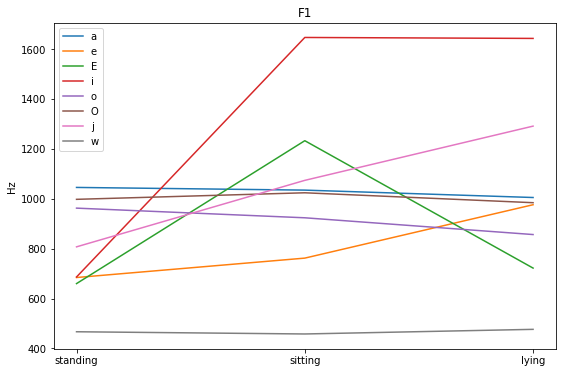

In [65]:
f = plot_formant(vals[0])

f.set_size_inches(9,6)
plt.title("F1")

plt.show()

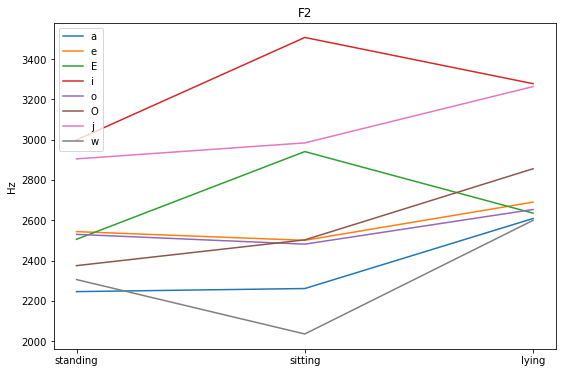

In [66]:
f = plot_formant(vals[1])

f.set_size_inches(9,6)
plt.title("F2")

plt.show()

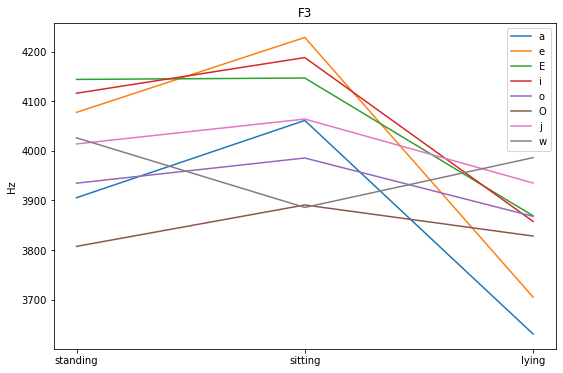

In [67]:
f = plot_formant(vals[2])

f.set_size_inches(9,6)
plt.title("F3")

plt.show()